In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

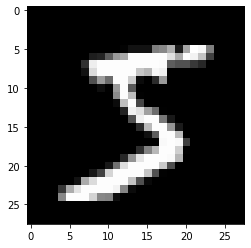

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

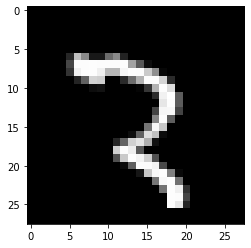

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu",padding="same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [ ]:
model.compile(loss="categorical_crossentropy", metrics='accuracy',optimizer="adam")

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 60s 63ms/step - loss: 0.2592 - accuracy: 0.9244 - val_loss: 0.0835 - val_accuracy: 0.9732
Epoch 2/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0733 - accuracy: 0.9773 - val_loss: 0.0551 - val_accuracy: 0.9821
Epoch 3/5
938/938 [==============================] - 68s 73ms/step - loss: 0.0521 - accuracy: 0.9836 - val_loss: 0.0386 - val_accuracy: 0.9875
Epoch 4/5
938/938 [==============================] - 58s 61ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0410 - val_accuracy: 0.9869
Epoch 5/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0396 - val_accuracy: 0.9871


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.259150,0.924383,0.083539,0.9732
1,0.073333,0.977267,0.055121,0.9821
2,0.052079,0.983567,0.038552,0.9875
3,0.041930,0.986750,0.041039,0.9869
4,0.034766,0.989100,0.039590,0.9871


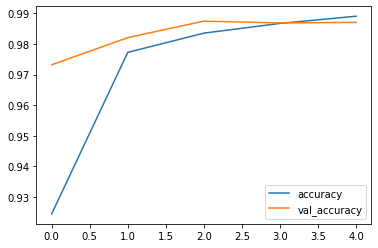

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

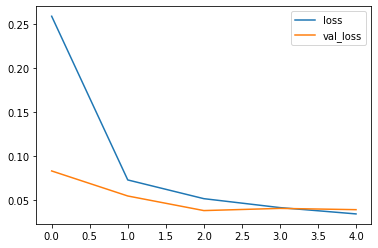

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 973    0    1    0    0    2    2    1    0    1]
 [   6 1110    3    2    1    2    3    5    3    0]
 [   1    0 1028    0    0    0    0    2    1    0]
 [   0    0    5  999    0    2    0    2    2    0]
 [   0    0    2    0  964    0    1    1    4   10]
 [   2    0    0    4    0  884    1    0    0    1]
 [   4    1    0    1    0    2  949    0    1    0]
 [   0    1   10    2    0    0    0 1006    1    8]
 [   2    0    3    1    0    1    1    0  965    1]
 [   0    0    2    2    4    4    1    0    3  993]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
img = image.load_img('imageseven.jpg')

In [ ]:
img = image.load_img('imageseven.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

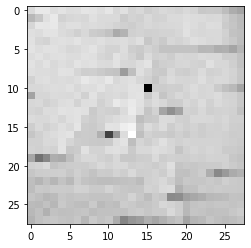

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [ ]:
print(x_single_prediction)

[8]
